In [1]:
from basic_functions import data_load

In [2]:
#Load Datasets
X_train = data_load("data/X_train.csv")
y_train = data_load("data/y_train_clustered.csv")
X_test = data_load("data/X_test.csv")
y_test = data_load("data/y_test_clustered.csv")

Data loaded!
Data loaded!
Data loaded!
Data loaded!


In [3]:
#Delete household-size (not categorical)
X_train = X_train.copy()
X_test = X_test.copy()

# CROSSTABs

## Crosstab Gender

In [4]:
#Pandas Crosstable (EMPLOYMENT STATUS)
import pandas as pd

table = pd.crosstab(X_train["gender"], y_train["income"], normalize="index")
table_rounded = (table*100).round(1)
print(table_rounded)

income  high  highest  lower middle  lowest  middle
gender                                             
0       18.0      7.3          32.5    13.6    28.7
1        7.5      1.7          39.4    33.7    17.7


In [5]:
desired_order = ["lowest", "lower middle", "middle", "high", "highest"]
table_rounded = table_rounded[desired_order]

In [6]:
label_data = data_load("data/df_labels.csv")
labels = list(label_data["gender"].dropna().unique())
income_labels = list(table_rounded.columns)
table_rounded.index = labels

Data loaded!


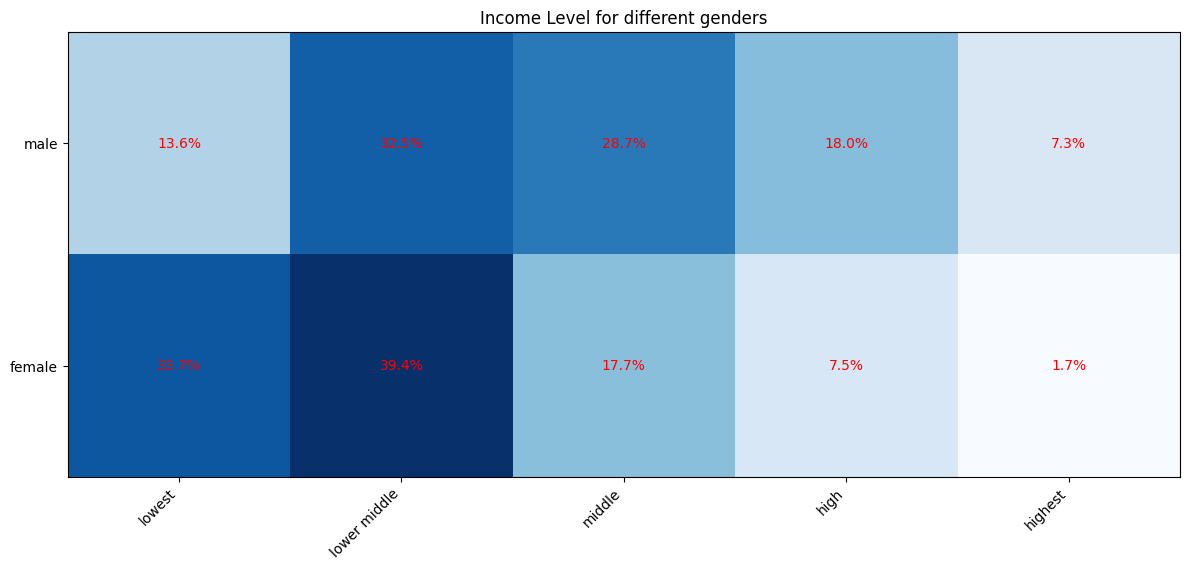

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(table_rounded.values, cmap="Blues")

# Labels
ax.set_xticks(range(len(income_labels)))
ax.set_xticklabels(income_labels, rotation=45, ha="right")
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)

# Textannotation mit numerischem Zugriff
for i, row_label in enumerate(labels):
    for j, col_label in enumerate(income_labels):
        value = table_rounded.loc[row_label, col_label]
        ax.text(j, i, f"{value}%", ha="center", va="center", color="r")

ax.set_title("Income Level for different genders")
fig.tight_layout()
plt.show()


## Crosstab Federal State

In [49]:
#Pandas Crosstable (EMPLOYMENT STATUS)
import pandas as pd

table = pd.crosstab(X_train["federal_state"], y_train["income"], normalize="index")
table_rounded = (table*100).round(1)
print(table_rounded)

income         high  highest  lower middle  lowest  middle
federal_state                                             
0              17.1      6.5          34.2    14.3    27.9
1               7.7      3.0          34.3    37.8    17.2


In [50]:
desired_order = ["lowest", "lower middle", "middle", "high", "highest"]
table_rounded = table_rounded[desired_order]

In [51]:
label_data = data_load("data/df_labels.csv")
labels = ["western", "eastern"]
income_labels = list(table_rounded.columns)
table_rounded.index = labels

Data loaded!


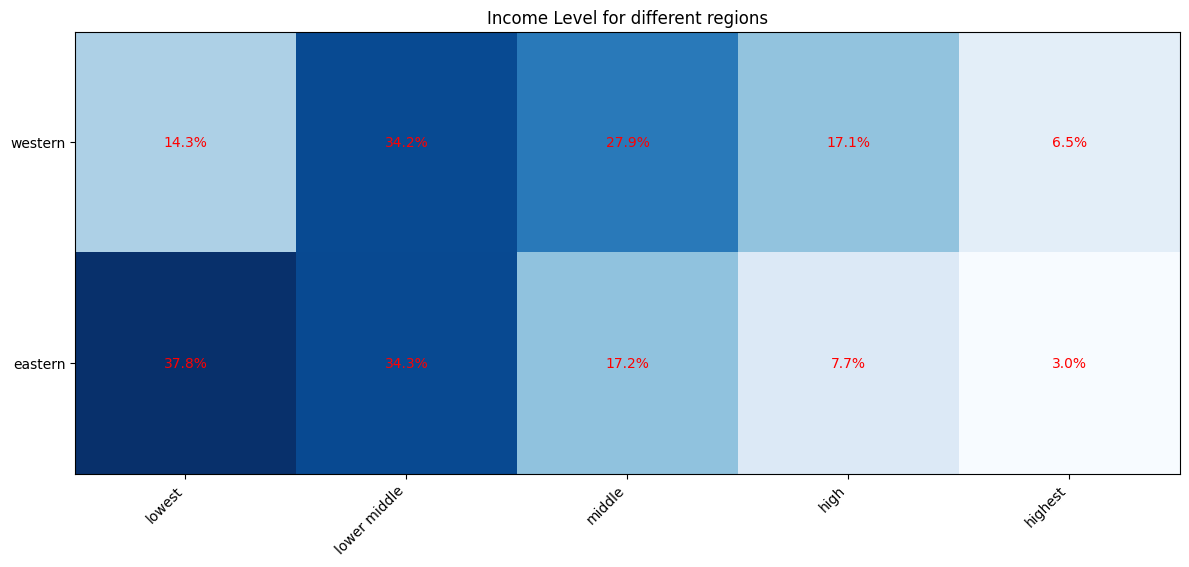

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(table_rounded.values, cmap="Blues")

# Labels
ax.set_xticks(range(len(income_labels)))
ax.set_xticklabels(income_labels, rotation=45, ha="right")
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)

# Textannotation mit numerischem Zugriff
for i, row_label in enumerate(labels):
    for j, col_label in enumerate(income_labels):
        value = table_rounded.loc[row_label, col_label]
        ax.text(j, i, f"{value}%", ha="center", va="center", color="r")

ax.set_title("Income Level for different regions")
fig.tight_layout()
plt.show()


## Crosstab Educational Qualification

In [12]:
#Pandas Crosstable (EMPLOYMENT STATUS)
import pandas as pd

table = pd.crosstab(X_train["educational_qualification"], y_train["income"], normalize="index")
table_rounded = (table*100).round(1)
print(table_rounded)

income                     high  highest  lower middle  lowest  middle
educational_qualification                                             
0                           6.2      1.8          45.6    17.7    28.6
1                           1.8      1.8          31.5    64.0     0.9
2                          11.6      3.3          36.7    19.3    29.1
3                          28.4      7.5          25.5    12.0    26.6
4                          29.1     13.8          20.7    11.7    24.8
5                           0.0      0.0          29.0    29.0    41.9
6                          12.1      0.0          48.5    21.2    18.2
7                           4.3      1.6          40.5    44.3     9.2
8                           1.8      0.4          41.2    41.5    15.2


In [13]:
desired_order = ["lowest", "lower middle", "middle", "high", "highest"]
table_rounded = table_rounded[desired_order]

In [14]:
label_data = data_load("data/df_labels.csv")
labels = [
  "Hauptschule",
  "Oberschule DDR (8./9. KL.)",
  "Realschule",
  "Fachhochschulreife",
  "Abitur",
  "max. 7 Jahre Schule",
  "ohne Angabe",
  "kein Abschluss",
  "Oberschule DDR (10. KL.)"
]
income_labels = list(table_rounded.columns)
table_rounded.index = labels

Data loaded!


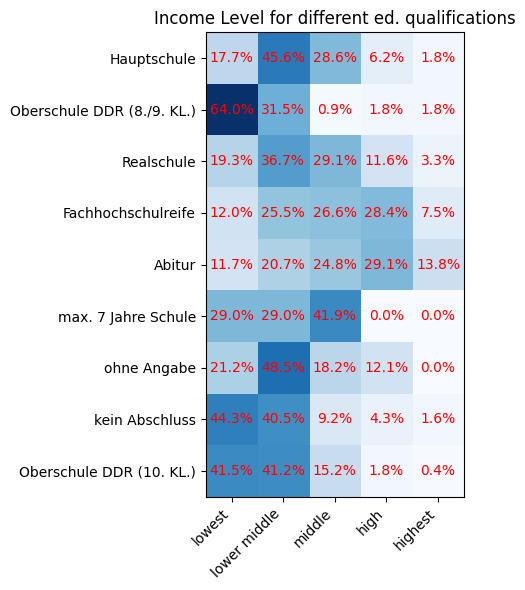

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(table_rounded.values, cmap="Blues")

# Labels
ax.set_xticks(range(len(income_labels)))
ax.set_xticklabels(income_labels, rotation=45, ha="right")
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)

# Textannotation mit numerischem Zugriff
for i, row_label in enumerate(labels):
    for j, col_label in enumerate(income_labels):
        value = table_rounded.loc[row_label, col_label]
        ax.text(j, i, f"{value}%", ha="center", va="center", color="r")

ax.set_title("Income Level for different ed. qualifications")
fig.tight_layout()
plt.show()


# CHI²-TEST & Feature Selection

In [16]:
from sklearn.feature_selection import chi2
chi2_scores, p_values = chi2(X_train, y_train)
chi2_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Chi2 Score": chi2_scores.round(2),
    "p-value": p_values.round(3)
}).sort_values(by="Chi2 Score", ascending=False)
print(chi2_df)

                      Feature  Chi2 Score  p-value
6                         job    38144.87     0.00
8                  livelihood     4476.60     0.00
10      highest_qualification     1305.22     0.00
9   educational_qualification      599.30     0.00
1                      gender      592.04     0.00
0               federal_state      545.83     0.00
7         employment_position      435.50     0.00
12     Household relationship      368.51     0.00
5           employment_sector      211.19     0.00
2                 citizenship       67.96     0.00
11          primary_residence       55.50     0.00
4           employment_status       46.53     0.00
3              marital_status        3.11     0.54


In [17]:
chidf = pd.DataFrame(chi2_df)
best_features = (list((chidf["Feature"].head(9))))

In [18]:
X_train = X_train[best_features]
X_test = X_test[best_features]

# CATEGORICAL NAIVE BAYESIAN

## Initial model setup

In [19]:
from sklearn.naive_bayes import CategoricalNB


clf = CategoricalNB(alpha=1)
clf.fit(X_train, y_train["income"])

,alpha,1
,force_alpha,True
,fit_prior,True
,class_prior,None
,min_categories,None


In [20]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score

y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit (Accuracy): {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Genauigkeit (balanced acc.): {balanced_accuracy:.2f}")
# Classification Report: Precision, Recall, F1-Score
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

Genauigkeit (Accuracy): 0.49
Genauigkeit (balanced acc.): 0.48
Klassifikationsbericht:
              precision    recall  f1-score   support

        high       0.39      0.54      0.45       650
     highest       0.41      0.43      0.42       240
lower middle       0.50      0.65      0.57      1530
      lowest       0.65      0.49      0.56       852
      middle       0.48      0.28      0.35      1175

    accuracy                           0.49      4447
   macro avg       0.49      0.48      0.47      4447
weighted avg       0.50      0.49      0.48      4447



## Hyperparameter training (GRID-SEARCH)

In [21]:
print(X_train.columns, y_train.columns)

Index(['job', 'livelihood', 'highest_qualification',
       'educational_qualification', 'gender', 'federal_state',
       'employment_position', 'Household relationship', 'employment_sector'],
      dtype='object') Index(['income'], dtype='object')


In [22]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]}

grid = GridSearchCV(CategoricalNB(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train["income"])

,estimator,CategoricalNB()
,param_grid,"{'alpha': [0.01, 0.1, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [23]:
grid_df = pd.DataFrame(grid.cv_results_)

In [24]:
grid_df[["param_alpha", "mean_test_score"]]

,param_alpha,mean_test_score
0,0.01,0.497687
1,0.10,0.497205
2,0.50,0.494989
3,1.00,0.494121
4,2.00,0.490652


In [25]:
cnb_clf = grid.best_estimator_

In [26]:
y_pred = cnb_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit (Accuracy): {accuracy:.2f}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Genauigkeit (balanced acc.): {balanced_accuracy:.2f}")
# Classification Report: Precision, Recall, F1-Score
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

Genauigkeit (Accuracy): 0.49
Genauigkeit (balanced acc.): 0.48
Klassifikationsbericht:
              precision    recall  f1-score   support

        high       0.39      0.54      0.45       650
     highest       0.41      0.45      0.43       240
lower middle       0.51      0.64      0.57      1530
      lowest       0.64      0.49      0.56       852
      middle       0.48      0.28      0.35      1175

    accuracy                           0.49      4447
   macro avg       0.49      0.48      0.47      4447
weighted avg       0.50      0.49      0.48      4447



## Problem visualization

### Dataframe for analysis

In [27]:
import numpy as np
probs = clf.predict_proba(X_test)
class_labels = clf.classes_

bestfit = np.argmax(probs, axis=1)
probs_masked = probs.copy()
probs_masked[np.arange(len(probs)), bestfit] = -1
secbestfit = np.argmax(probs_masked, axis=1)

top1_labels = class_labels[bestfit]
top2_labels = class_labels[secbestfit]

In [28]:
# max probability for each sample
max_probs = np.max(probs, axis = 1)

In [29]:
print(max_probs)

[0.5849158  0.53487048 0.78450465 ... 0.71832431 0.59017189 0.53093031]


In [30]:
# entropy for each sample
from scipy.stats import entropy
entropies = entropy(probs, axis=1)

In [31]:
y_test = y_test.reset_index(drop=True)

confusion_pairs = pd.DataFrame({
    "true_label": y_test["income"].values,
    "predicted_top1": top1_labels,
    "predicted_top2": top2_labels,
    "max_probability": max_probs,
    "entropy": entropies
})

In [32]:
confusion_pairs["is_correct"] = confusion_pairs["true_label"] == confusion_pairs["predicted_top1"]

In [33]:
confusion_pairs.head()

,true_label,predicted_top1,predicted_top2,max_probability,entropy,is_correct
0,lower middle,lowest,lower middle,0.584916,0.889602,False
1,lower middle,lower middle,lowest,0.534870,0.840015,True
2,middle,lower middle,middle,0.784505,0.642648,False
3,middle,lower middle,middle,0.607269,0.884232,False
4,lower middle,lower middle,lowest,0.506821,0.907492,True


### Confusion and misclassification

In [34]:

pair_counts = (
    confusion_pairs
    .groupby(["predicted_top1", "predicted_top2"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

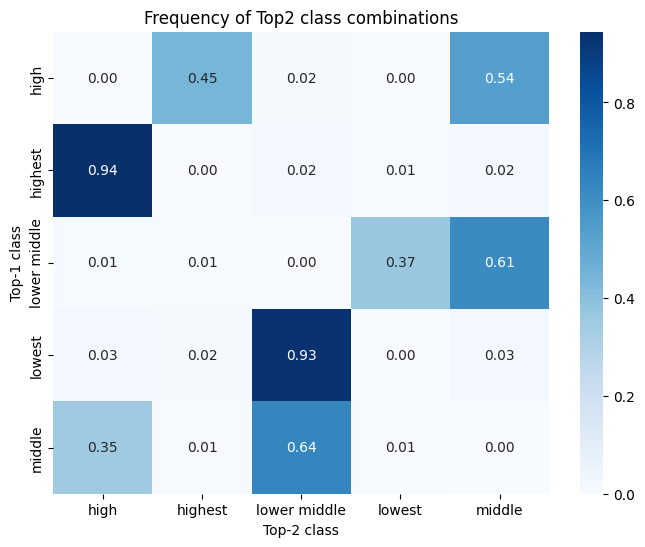

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = pair_counts.pivot(index="predicted_top1", columns="predicted_top2", values="count").fillna(0)
pivot_relative = pivot.div(pivot.sum(axis=1), axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_relative, annot=True, fmt=".2f", cmap="Blues")
plt.title("Frequency of Top2 class combinations")
plt.xlabel("Top-2 class")
plt.ylabel("Top-1 class")
plt.show()


### Misclassification

In [36]:
errors_df = confusion_pairs[confusion_pairs["true_label"] != confusion_pairs["predicted_top1"]]
conf_matrix_errors = (
    errors_df
    .groupby(["true_label", "predicted_top1"])
    .size()
    .unstack(fill_value=0)
)

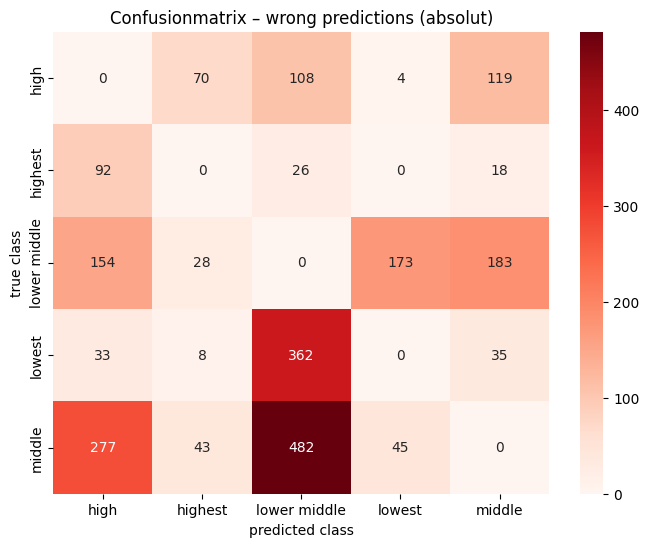

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_errors, annot=True, fmt=".0f", cmap="Reds")
plt.title("Confusionmatrix – wrong predictions (absolut)")
plt.xlabel("predicted class")
plt.ylabel("true class")
plt.show()

### Connection between max(p) and entropy

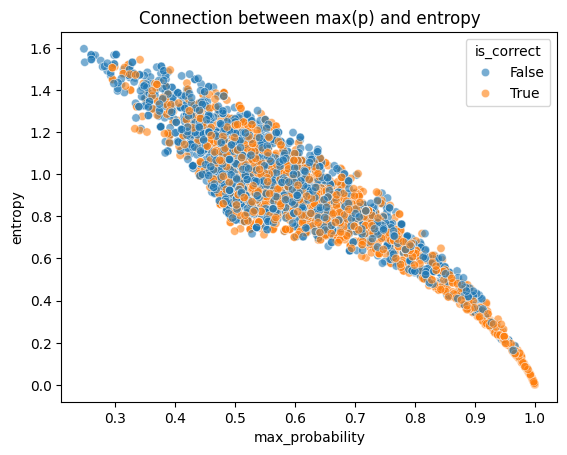

In [38]:
sns.scatterplot(data=confusion_pairs, x="max_probability", y="entropy", hue="is_correct", alpha=0.6)
plt.title("Connection between max(p) and entropy")
plt.show()

In [39]:
mask_high_conf = ((confusion_pairs["entropy"]< 0.7) & (confusion_pairs["max_probability"] > 0.5))

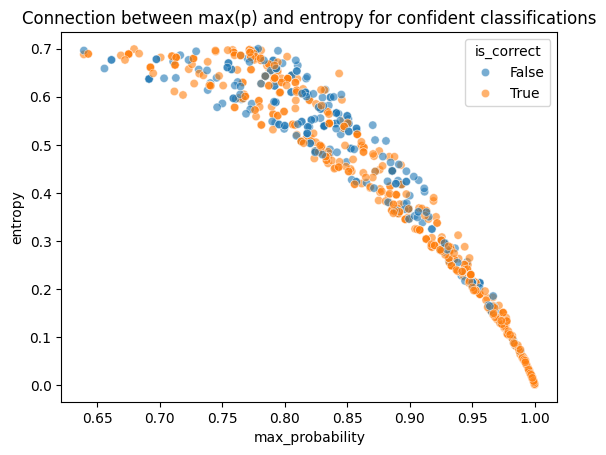

In [40]:
sns.scatterplot(data=confusion_pairs[mask_high_conf], x="max_probability", y="entropy", hue="is_correct", alpha=0.6)
plt.title("Connection between max(p) and entropy for confident classifications")
plt.show()

In [41]:
conf_and_correct = confusion_pairs[mask_high_conf]["is_correct"].mean()
print(f"Accuracy for conf. predictions: {conf_and_correct:.2%}")

Accuracy for conf. predictions: 66.35%


### Uncertainty Max Probability

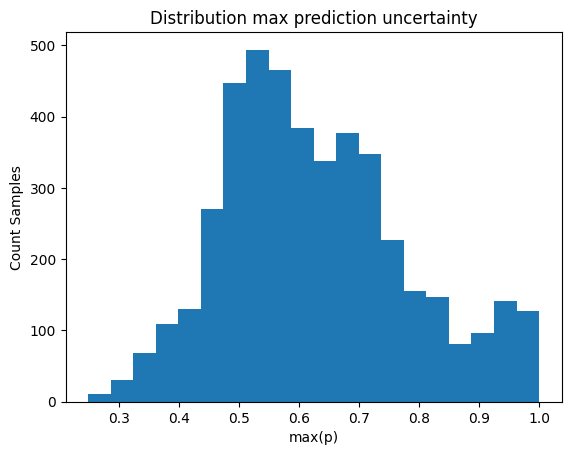

In [42]:
plt.hist(confusion_pairs["max_probability"], bins= 20)
plt.title("Distribution max prediction uncertainty")
plt.xlabel("max(p)")
plt.ylabel("Count Samples")
plt.show()

### Uncertainty Entropy

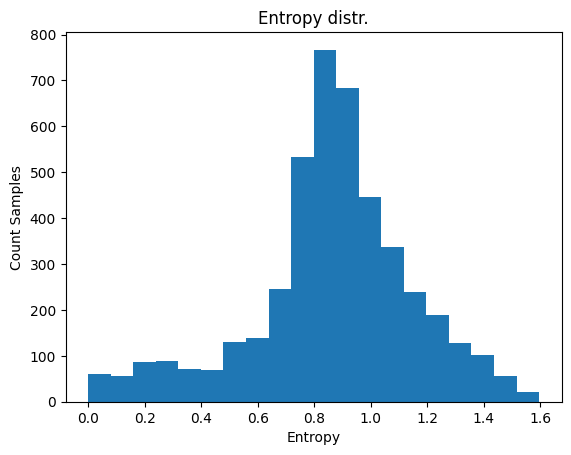

In [43]:
plt.hist(confusion_pairs["entropy"], bins= 20)
plt.title("Entropy distr.")
plt.xlabel("Entropy")
plt.ylabel("Count Samples")
plt.show()


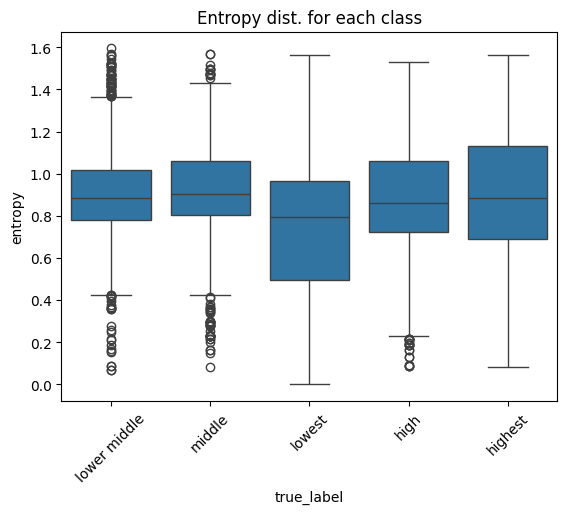

In [44]:
sns.boxplot(data=confusion_pairs, x="true_label", y="entropy")
plt.xticks(rotation=45)
plt.title("Entropy dist. for each class")
plt.show()


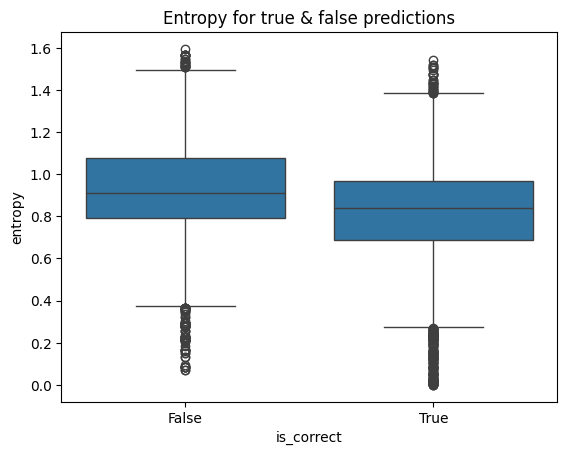

In [45]:
confusion_pairs["is_correct"] = confusion_pairs["true_label"] == confusion_pairs["predicted_top1"]

sns.boxplot(data=confusion_pairs, x="is_correct", y="entropy")
plt.title("Entropy for true & false predictions")
plt.show()


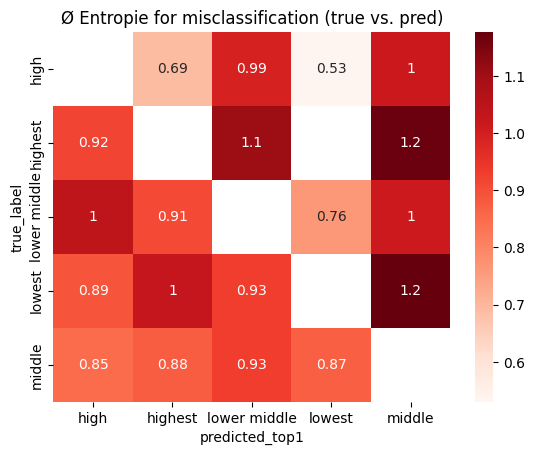

In [46]:
import numpy as np

error_only = confusion_pairs[~confusion_pairs["is_correct"]]
pivot_error_only = error_only.pivot_table(values="entropy", index="true_label", columns="predicted_top1", aggfunc="mean")

sns.heatmap(pivot_error_only, annot=True, cmap="Reds")
plt.title("Ø Entropie for misclassification (true vs. pred)")
plt.show()
